In [1]:
# Import basic modules
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.formula.api as sm


# Modeling
from sklearn import linear_model, preprocessing
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import statsmodels.api as sm 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [2]:
 #Import the provincial data previously cleaned, explored, feature-engineered and... 
# ..stored as cleaned_train.csv

data= pd.read_csv('cleaned_train.csv')

In [3]:
data=data.drop('Unnamed: 0',axis=1)

In [4]:
data.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year,week,weekday,sales,item_name,item_category_id,first_sale_date,shop_name,city,item_category_name,major
0,2013-01-02,0,59,22154,999.0,1.0,2,1,2013,1,2,999.0,ЯВЛЕНИЕ 2012 (BD),37,0.0,"Ярославль ТЦ ""Альтаир""",Ярославль,Кино - Blu-Ray,Кино
1,2013-04-26,3,59,944,150.0,1.0,26,4,2013,17,4,150.0,2012 (BD),37,0.0,"Ярославль ТЦ ""Альтаир""",Ярославль,Кино - Blu-Ray,Кино
2,2013-06-26,5,59,944,199.5,1.0,26,6,2013,26,2,199.5,2012 (BD),37,0.0,"Ярославль ТЦ ""Альтаир""",Ярославль,Кино - Blu-Ray,Кино
3,2013-07-20,6,59,944,199.5,1.0,20,7,2013,29,5,199.5,2012 (BD),37,0.0,"Ярославль ТЦ ""Альтаир""",Ярославль,Кино - Blu-Ray,Кино
4,2013-09-14,8,59,944,299.0,2.0,14,9,2013,37,5,598.0,2012 (BD),37,0.0,"Ярославль ТЦ ""Альтаир""",Ярославль,Кино - Blu-Ray,Кино


In [5]:
encoded_columns = pd.get_dummies(data['city'])
data = data.join(encoded_columns).drop('city',axis=1)

In [6]:
encoded_columns = pd.get_dummies(data['major'])
data = data.join(encoded_columns).drop('major',axis=1)

In [7]:
data.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year,week,...,other,Аксессуары,Игровые,Игры,Карты,Кино,Книги,Музыка,Подарки,Программы
0,2013-01-02,0,59,22154,999.0,1.0,2,1,2013,1,...,0,0,0,0,0,1,0,0,0,0
1,2013-04-26,3,59,944,150.0,1.0,26,4,2013,17,...,0,0,0,0,0,1,0,0,0,0
2,2013-06-26,5,59,944,199.5,1.0,26,6,2013,26,...,0,0,0,0,0,1,0,0,0,0
3,2013-07-20,6,59,944,199.5,1.0,20,7,2013,29,...,0,0,0,0,0,1,0,0,0,0
4,2013-09-14,8,59,944,299.0,2.0,14,9,2013,37,...,0,0,0,0,0,1,0,0,0,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2433534 entries, 0 to 2433533
Data columns (total 55 columns):
 #   Column              Dtype  
---  ------              -----  
 0   date                object 
 1   date_block_num      int64  
 2   shop_id             int64  
 3   item_id             int64  
 4   item_price          float64
 5   item_cnt_day        float64
 6   day                 int64  
 7   month               int64  
 8   year                int64  
 9   week                int64  
 10  weekday             int64  
 11  sales               float64
 12  item_name           object 
 13  item_category_id    int64  
 14  first_sale_date     float64
 15  shop_name           object 
 16  item_category_name  object 
 17  Адыгея              uint8  
 18  Балашиха            uint8  
 19  Волжский            uint8  
 20  Вологда             uint8  
 21  Воронеж             uint8  
 22  Жуковский           uint8  
 23  Интернет-магазин    uint8  
 24  Казань              uint

In [9]:
data['date']=pd.to_datetime(data['date'])

In [10]:
data.columns

Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day', 'day', 'month', 'year', 'week', 'weekday', 'sales',
       'item_name', 'item_category_id', 'first_sale_date', 'shop_name',
       'item_category_name', 'Адыгея', 'Балашиха', 'Волжский', 'Вологда',
       'Воронеж', 'Жуковский', 'Интернет-магазин', 'Казань', 'Калуга',
       'Коломна', 'Красноярск', 'Курск', 'Москва', 'Н.Новгород', 'Новосибирск',
       'Омск', 'РостовНаДону', 'СПб', 'Самара', 'Сергиев', 'Сургут', 'Томск',
       'Тюмень', 'Уфа', 'Цифровой', 'Чехов', 'Якутск', 'Ярославль', 'other',
       'Аксессуары', 'Игровые', 'Игры', 'Карты', 'Кино', 'Книги', 'Музыка',
       'Подарки', 'Программы'],
      dtype='object')

In [11]:
#Dropping columns that are not in use
data=data.drop('item_name',axis=1)
data=data.drop('item_category_name',axis=1)
data=data.drop('shop_name',axis=1)

In [12]:
data=data.drop('date',axis=1)

In [13]:
data.columns

Index(['date_block_num', 'shop_id', 'item_id', 'item_price', 'item_cnt_day',
       'day', 'month', 'year', 'week', 'weekday', 'sales', 'item_category_id',
       'first_sale_date', 'Адыгея', 'Балашиха', 'Волжский', 'Вологда',
       'Воронеж', 'Жуковский', 'Интернет-магазин', 'Казань', 'Калуга',
       'Коломна', 'Красноярск', 'Курск', 'Москва', 'Н.Новгород', 'Новосибирск',
       'Омск', 'РостовНаДону', 'СПб', 'Самара', 'Сергиев', 'Сургут', 'Томск',
       'Тюмень', 'Уфа', 'Цифровой', 'Чехов', 'Якутск', 'Ярославль', 'other',
       'Аксессуары', 'Игровые', 'Игры', 'Карты', 'Кино', 'Книги', 'Музыка',
       'Подарки', 'Программы'],
      dtype='object')

In [14]:
data.date_block_num.max()

33

In [15]:
data.date_block_num.min()

0

In [16]:
X_train = data[data.date_block_num < 33].drop(['item_cnt_day'], axis=1)
y_train = data[data.date_block_num < 33]['item_cnt_day']
X_test = data[data.date_block_num == 33].drop(['item_cnt_day'], axis=1)
y_test = data[data.date_block_num == 33]['item_cnt_day']

## Linear Regression

In [17]:
lm = LinearRegression()
lm

LinearRegression()

In [18]:
lm.fit(X_train, y_train)
y_pred_linear = lm.predict(X_test)

In [19]:
score_lm = lm.score(X_test, y_test)
print(score_lm)

0.08435393162653426


In [20]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_linear))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_linear))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_linear)))
print('R^2:', metrics.r2_score(y_test, y_pred_linear))

Mean Absolute Error: 0.36368971054301824
Mean Squared Error: 6.121960776663623
Root Mean Squared Error: 2.4742596421280494
R^2: 0.08435393162653426


Text(0, 0.5, 'Predicted values')

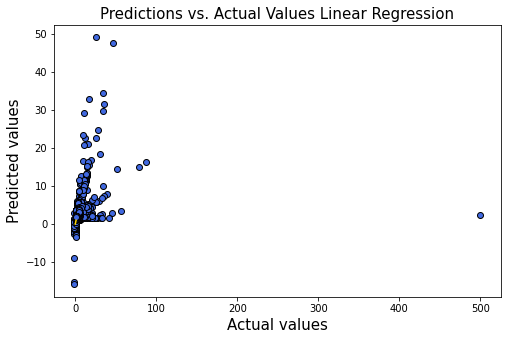

In [21]:
# Plot the predictions against the actual result
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_linear, color='royalblue', edgecolor='k')

# Add a line for perfect correlation
plt.plot([x for x in range(0, 2)],[x for x in range(0, 2)], color='gold')

# Label 
plt.title('Predictions vs. Actual Values Linear Regression', fontsize=15)
plt.xlabel('Actual values', fontsize=15)
plt.ylabel('Predicted values', fontsize=15)

# Linear Regression with Statsmodel

In [22]:
# Create constants for X train and test
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

c:\users\ssachwa1\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [23]:
# Create the model
rModel2 = sm.OLS(y_train, X_train)

# Fit the model
rModel2_results = rModel2.fit()

In [24]:
rModel2_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           item_cnt_day   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                 2.214e+04
Date:                Wed, 25 Aug 2021   Prob (F-statistic):               0.00
Time:                        18:40:00   Log-Likelihood:            -4.8714e+06
No. Observations:             2381713   AIC:                         9.743e+06
Df Residuals:                 2381665   BIC:                         9.744e+06
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              9.54e-07   3.87e-08     24.642      0.000    8.78e-07    1.03e-06
date_block_num      -0.0037      0.000    -20.925      0.000      -0.004      -0.003
shop_id              0.0081      0.001     12.572      0.000       0.007       0.009
item_id           1.084e-05   2.62e-07     41.433      0.000    1.03e-05    1.14e-05
item_price          -0.0003   1.35e-06   -254.809      0.000      -0.000      -0.000
day                  0.0004      0.000      2.874      0.004       0.000       0.001
month                0.0101      0.001     11.247      0.000       0.008       0.012
year                 0.0008   1.25e-05     61.474      0.000       0.001       0.001
week                -0.0009      0.000     -4.350      0.000      -0.001      -0.000
weekday              0.0014      0.001      2.217      0.027       0.000       0.003
sales                0.0002   2.27e-07    992.953      0.000       0.000       0.000
item_category_id    -0.0112      0.000    -36.359      0.000      -0.012      -0.011
first_sale_date      0.0051      0.000     26.578      0.000       0.005       0.005
Адыгея               0.1581      0.022      7.247      0.000       0.115       0.201
Балашиха             0.1393      0.021      6.534      0.000       0.098       0.181
Волжский             0.1639      0.020      8.318      0.000       0.125       0.203
Вологда              0.1259      0.019      6.569      0.000       0.088       0.163
Воронеж              0.1746      0.017     10.551      0.000       0.142       0.207
Жуковский            0.1045      0.018      5.726      0.000       0.069       0.140
Интернет-магазин     0.5329      0.016     33.855      0.000       0.502       0.564
Казань               0.1611      0.014     11.127      0.000       0.133       0.190
Калуга               0.1331      0.013     10.465      0.000       0.108       0.158
Коломна              0.0656      0.012      5.250      0.000       0.041       0.090
Красноярск           0.0970      0.012      8.419      0.000       0.074       0.120
Курск                0.0494      0.011      4.664      0.000       0.029       0.070
Москва               0.1040      0.004     28.736      0.000       0.097       0.111
Н.Новгород          -0.0648      0.008     -8.226      0.000      -0.080      -0.049
Новосибирск         -0.0712      0.010     -7.014      0.000      -0.091      -0.051
Омск                -0.1228      0.010    -12.433      0.000      -0.142      -0.103
РостовНаДону        -0.1125      0.010    -11.348      0.000      -0.132      -0.093
СПб                 -0.0203      0.009     -2.172      0.030      -0.039      -0.002
Самара              -0.1721      0.011    -15.308      0.000      -0.194      -0.150
Сергиев             -0.1415      0.012    -11.518      0.000      -0.166      -0.117
Сургут              -0.

# Decision Tree 

In [25]:
X_train = data[data.date_block_num < 33].drop(['item_cnt_day'], axis=1)
y_train = data[data.date_block_num < 33]['item_cnt_day']
X_test = data[data.date_block_num == 33].drop(['item_cnt_day'], axis=1)
y_test = data[data.date_block_num == 33]['item_cnt_day']

In [26]:
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
y_pred_decision = regressor.predict(X_test)
decision_df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred_decision})
decision_df

,Actual,Predicted
381,1.0,1.0
458,1.0,1.0
472,1.0,1.0
532,1.0,1.0
533,1.0,1.0
...,...,...
2433526,1.0,1.0
2433527,1.0,1.0
2433528,1.0,1.0
2433529,1.0,1.0


In [27]:
score_dt = regressor.score(X_test, y_test)
print(score_dt)

0.9916559020322433


In [28]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_decision))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_decision))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_decision)))
print('R^2:', metrics.r2_score(y_test, y_pred_decision))

Mean Absolute Error: 0.004805001833233631
Mean Squared Error: 0.05578819397541537
Root Mean Squared Error: 0.23619524545471987
R^2: 0.9916559020322433


Text(0, 0.5, 'Predicted values')

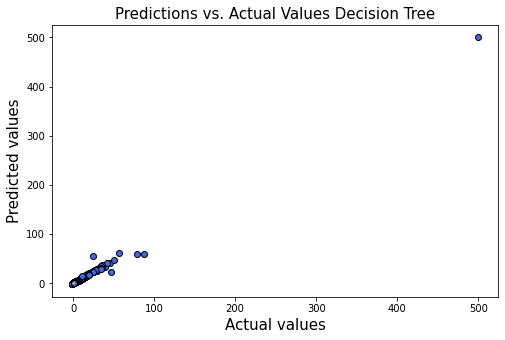

In [29]:
# Plot the predictions against the actual result
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_decision, color='royalblue', edgecolor='k')

# Add a line for perfect correlation
plt.plot([x for x in range(0, 2)],[x for x in range(0, 2)], color='gold')

# Label 
plt.title("Predictions vs. Actual Values Decision Tree", fontsize=15)
plt.xlabel("Actual values", fontsize=15)
plt.ylabel("Predicted values", fontsize=15)

In [30]:
# create feature importance
tree_df = pd.DataFrame({'Feature Names': X_train.columns, 'Importance': regressor.feature_importances_})
tree_df = tree_df.sort_values(by='Importance', ascending=True)
tree_df.reset_index(inplace=True)
tree_df.tail(20)

,index,Feature Names,Importance
30,30,Самара,0.000004
31,23,Курск,0.000028
32,11,first_sale_date,0.000033
33,43,Игры,0.000052
34,24,Москва,0.000053
35,18,Интернет-магазин,0.000054
36,5,month,0.000059
37,6,year,0.000067
38,17,Жуковский,0.000080
39,40,other,0.000094


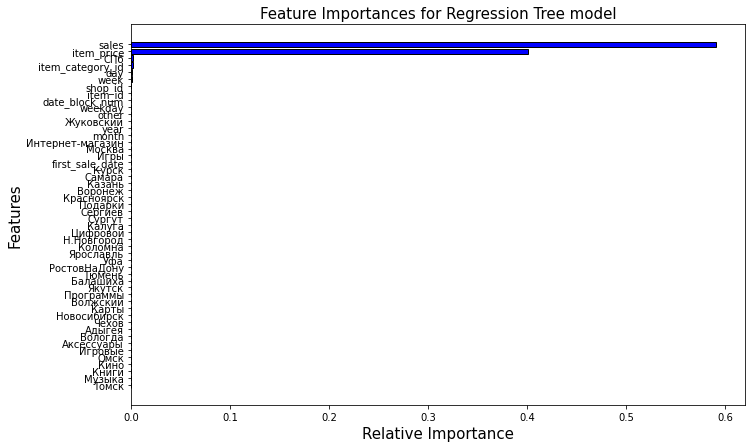

In [31]:
# Visual comparison:
plt.figure(figsize=(11,7))
_= plt.barh(tree_df['Feature Names'], tree_df['Importance'], align='center', color='blue', edgecolor='k')
plt.xlabel('Relative Importance',fontsize=15)
plt.ylabel('Features',fontsize=15)
plt.title('Feature Importances for Regression Tree model', fontsize=15)
plt.show()

## Random Forest

In [32]:
random = RandomForestRegressor(n_estimators=20, random_state=0)
random.fit(X_train, y_train)
y_pred_random = random.predict(X_test)

In [33]:
score_random = random.score(X_test, y_test)
print(score_random)

0.9979528602745328


In [34]:
# Metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_random))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_random))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_random)))
print('R^2:', metrics.r2_score(y_test, y_pred_random))

Mean Absolute Error: 0.003186931938789295
Mean Squared Error: 0.013687067019162127
Root Mean Squared Error: 0.11699173910649473
R^2: 0.9979528602745328


Text(0, 0.5, 'Predicted values')

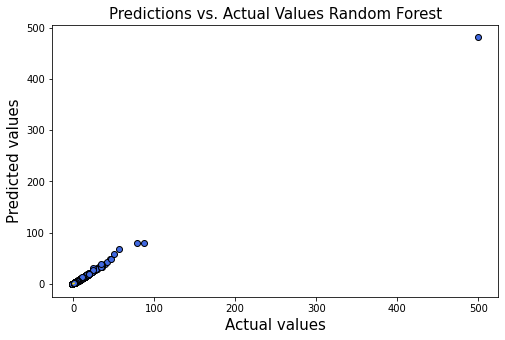

In [35]:
# Plot the predictions against the actual result
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_random, color='royalblue', edgecolor='k')

# Add a line for perfect correlation
plt.plot([x for x in range(0, 2)],[x for x in range(0, 2)], color='gold')

# Label 
plt.title("Predictions vs. Actual Values Random Forest", fontsize=15)
plt.xlabel("Actual values", fontsize=15)
plt.ylabel("Predicted values", fontsize=15)